### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 341_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,...,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000,6333.000000
mean,0.029328,0.216908,0.602775,1.410396,1.956914,11.290416,1.747526,1.102211,1.009225,1.008723,...,1.789900,1.847970,2.042697,1.960750,0.860865,1.508359,2.027369,1.967730,1.847137,49.352108
std,0.010113,0.017891,0.037922,0.014505,0.025224,3.217354,0.342515,0.023329,0.001653,0.005203,...,0.029052,0.026446,0.030852,0.080404,0.059892,0.029013,0.021175,0.007024,0.021853,11.856470
min,0.007414,0.147215,0.561675,1.383578,1.841620,3.290258,1.285321,1.065242,1.003513,1.000274,...,1.547334,1.757816,1.794020,1.651938,0.220933,1.282265,1.788643,1.913799,1.799972,30.200000
25%,0.024932,0.210249,0.579119,1.402244,1.951715,9.594165,1.570676,1.086628,1.008764,1.004916,...,1.781436,1.834460,2.042820,1.905877,0.853450,1.498290,2.021079,1.965257,1.831736,41.700000
50%,0.026625,0.214769,0.585554,1.405926,1.964187,10.407833,1.622176,1.099557,1.009507,1.007576,...,1.794597,1.850619,2.049594,1.979325,0.868576,1.509582,2.026393,1.967486,1.842270,46.200000
75%,0.029150,0.219050,0.608911,1.410772,1.972856,11.634688,1.735299,1.108286,1.010039,1.011049,...,1.805872,1.864108,2.054972,2.021582,0.885371,1.522055,2.033069,1.969805,1.864426,51.700000
max,0.085261,0.276345,0.733351,1.471018,1.987910,32.281873,3.430464,1.197120,1.015613,1.041407,...,1.854880,2.067900,2.073895,2.078493,0.946573,1.648001,2.065147,2.074526,1.915163,93.600000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

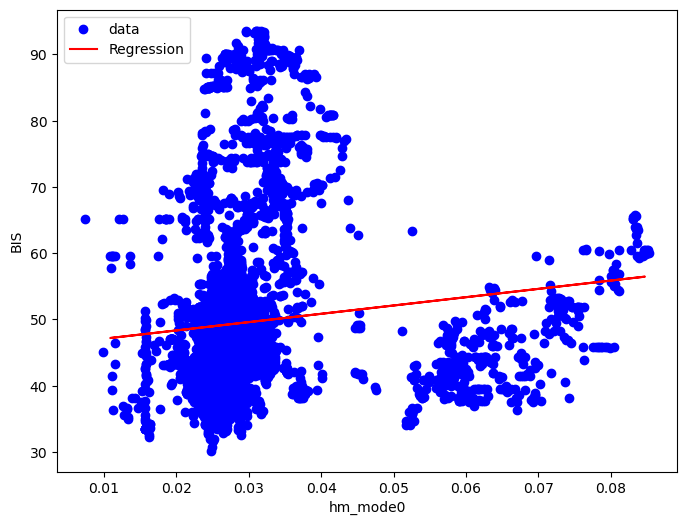

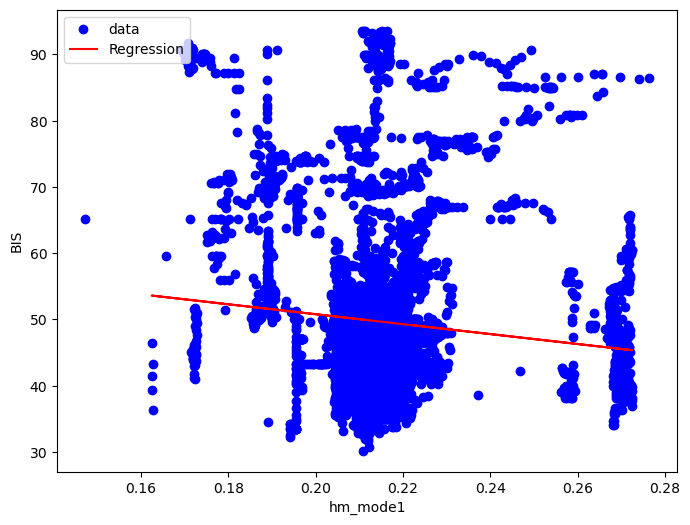

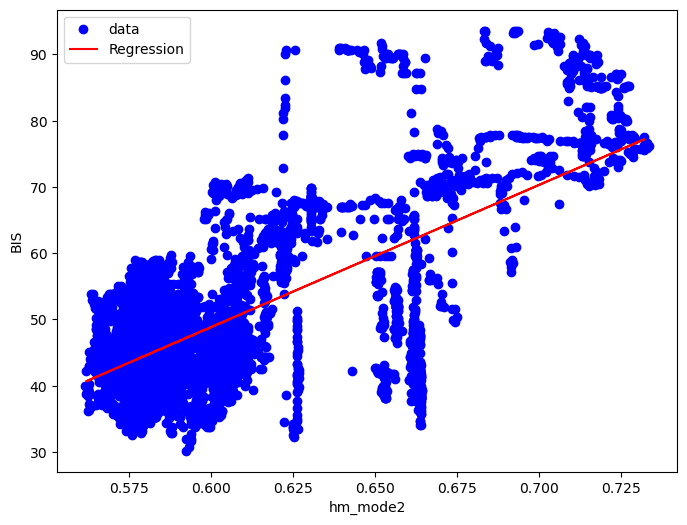

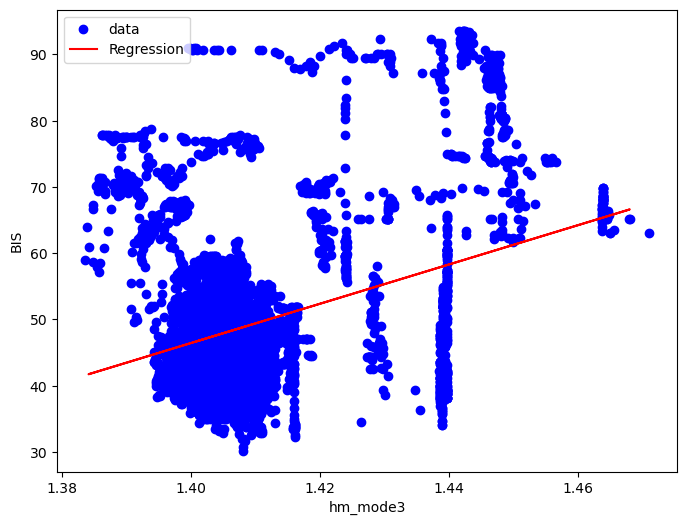

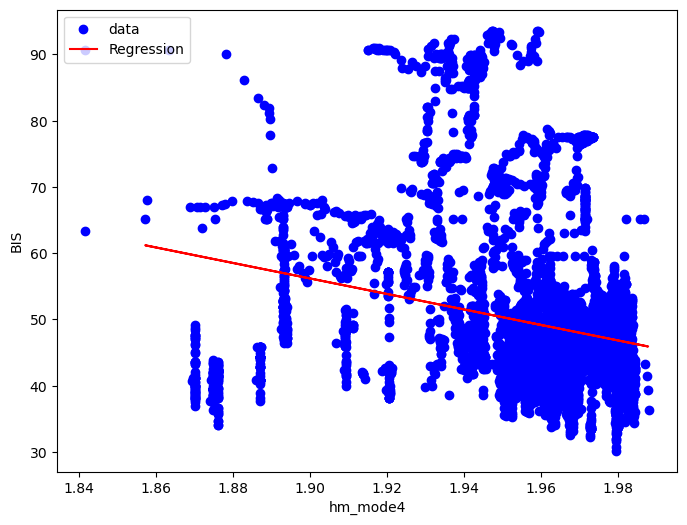

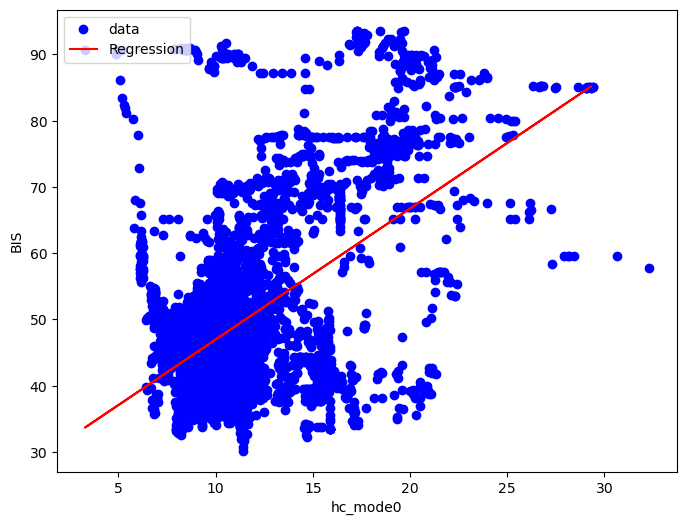

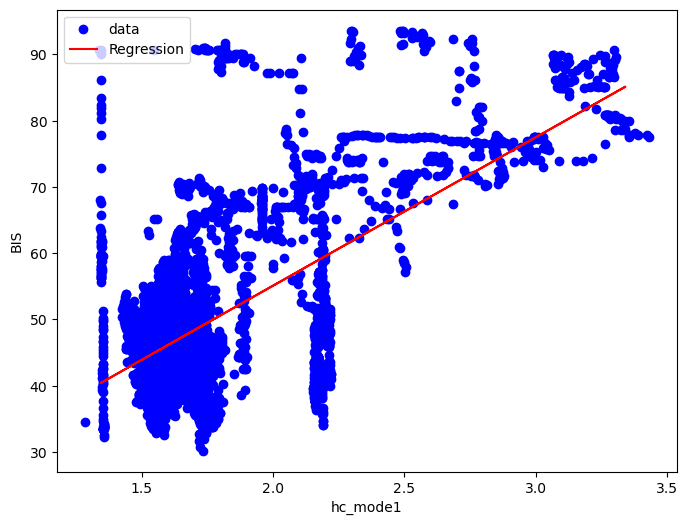

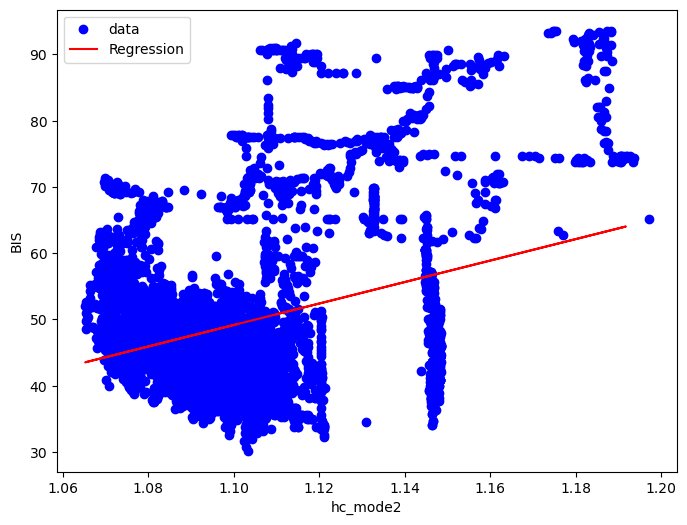

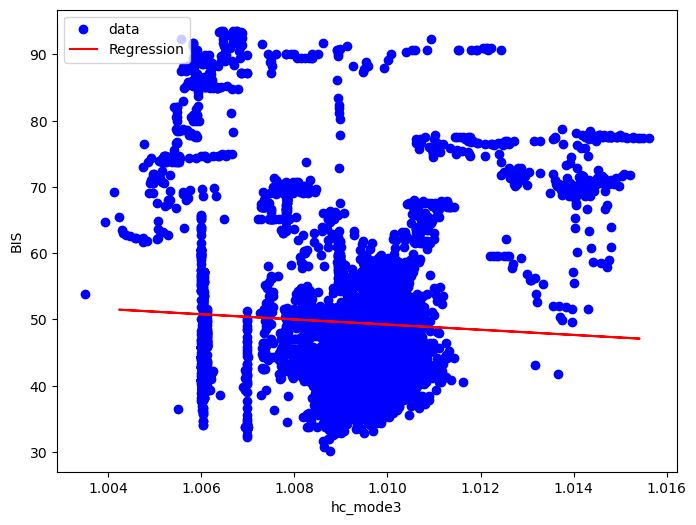

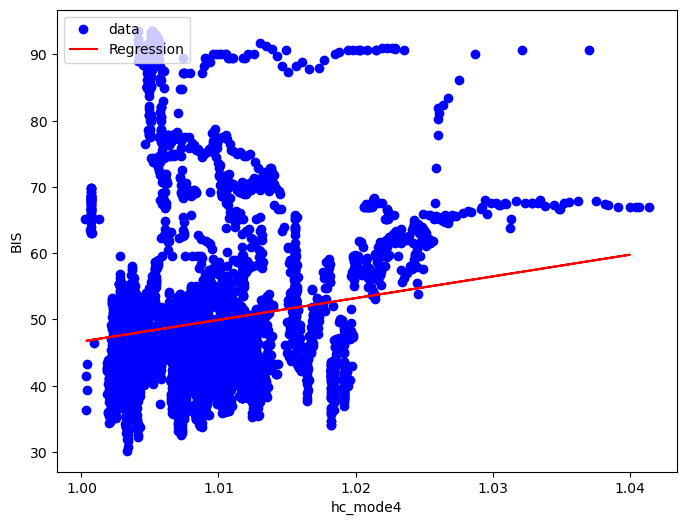

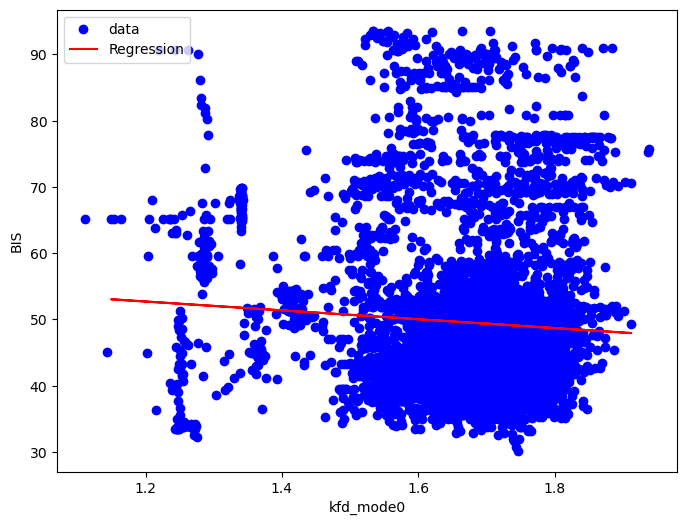

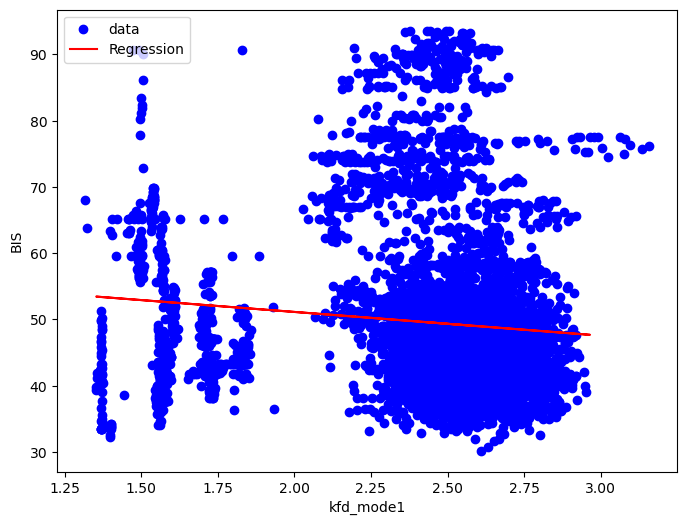

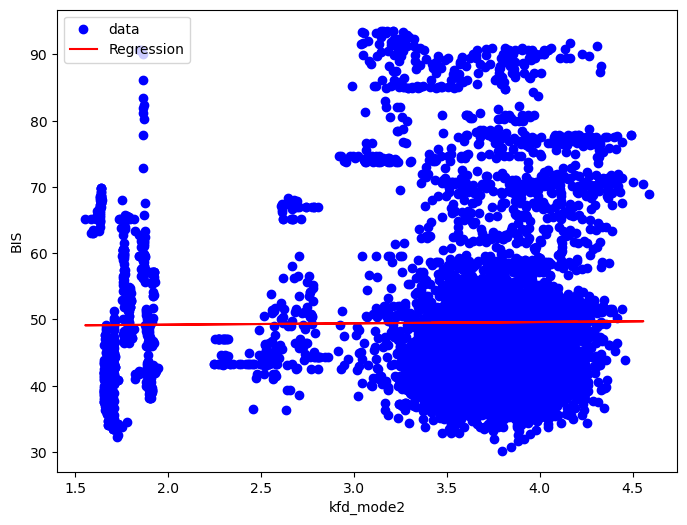

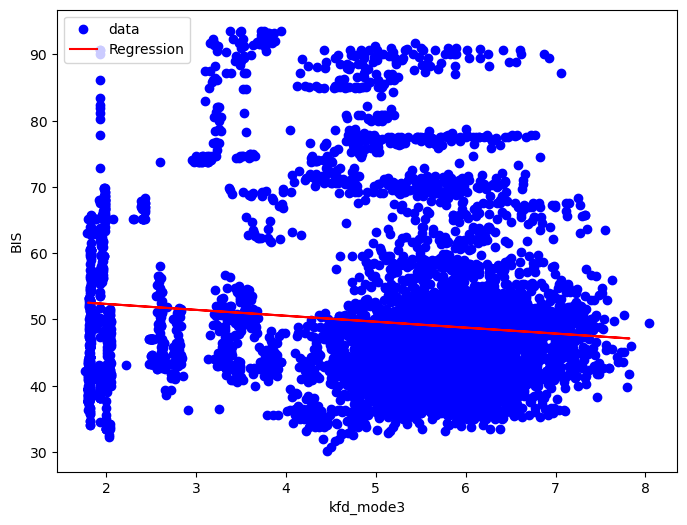

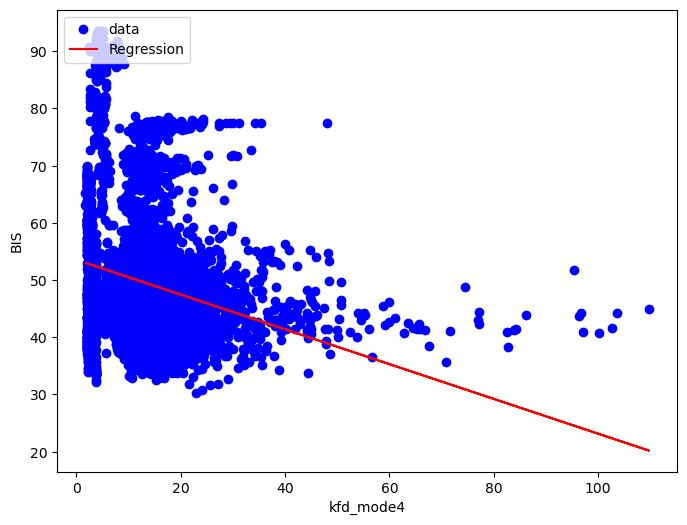

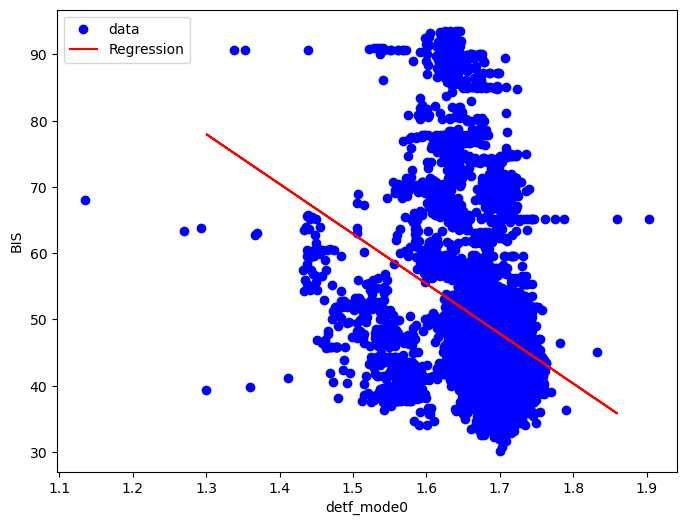

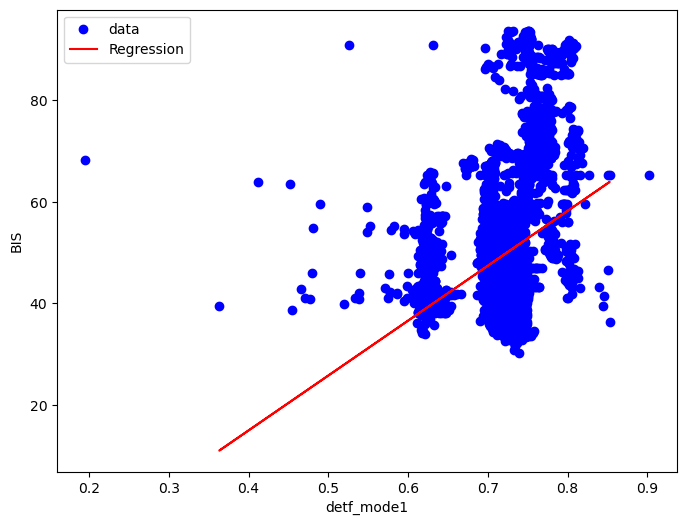

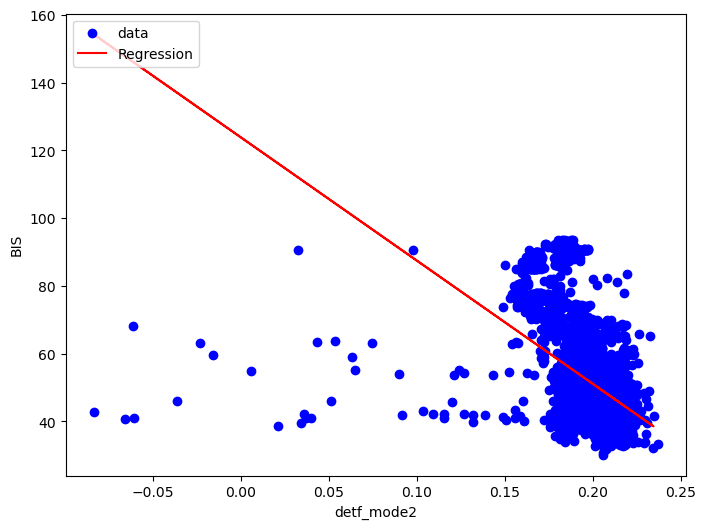

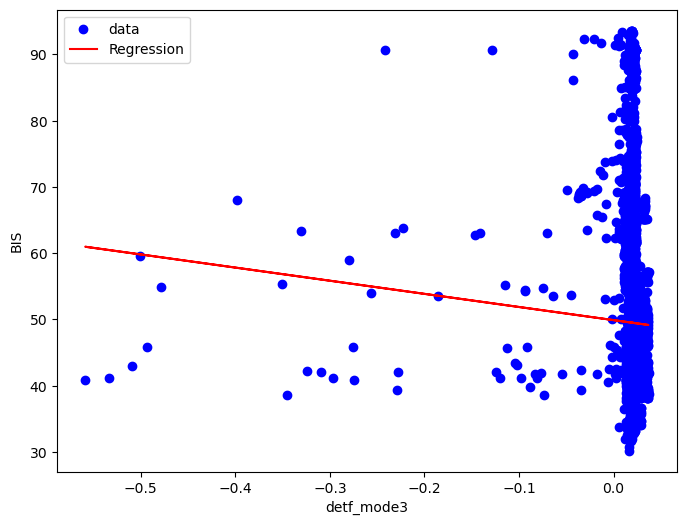

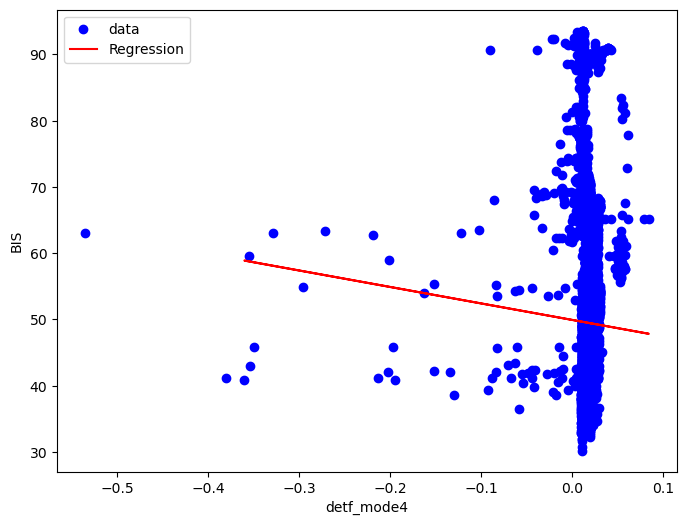

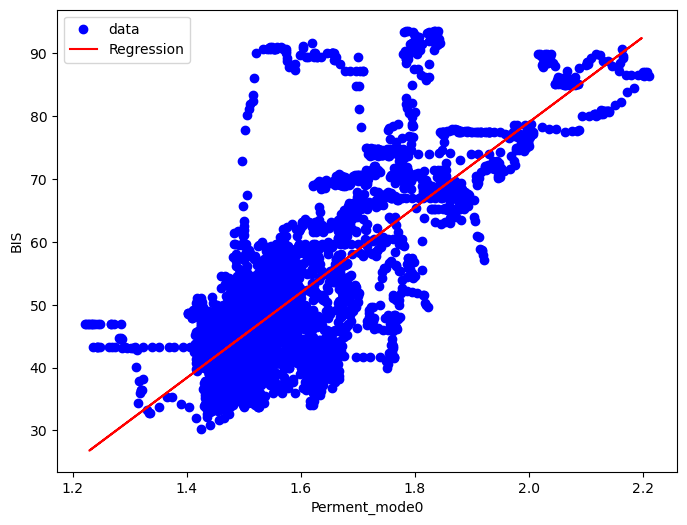

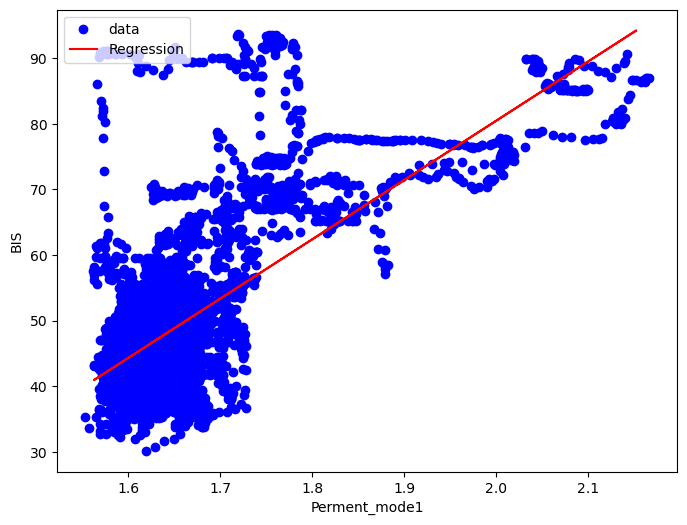

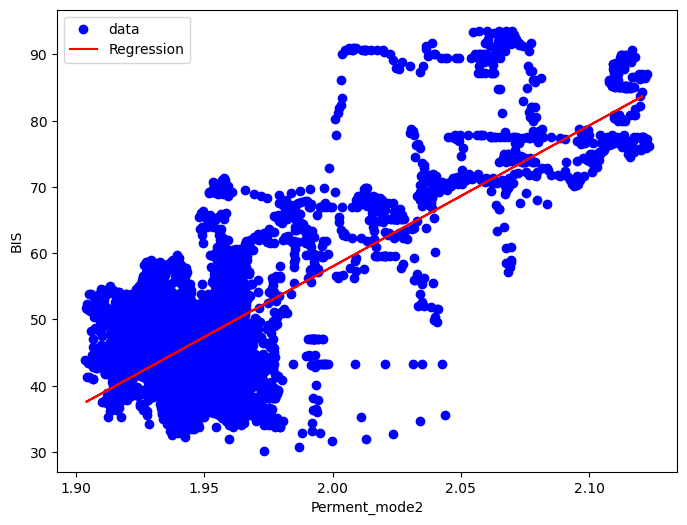

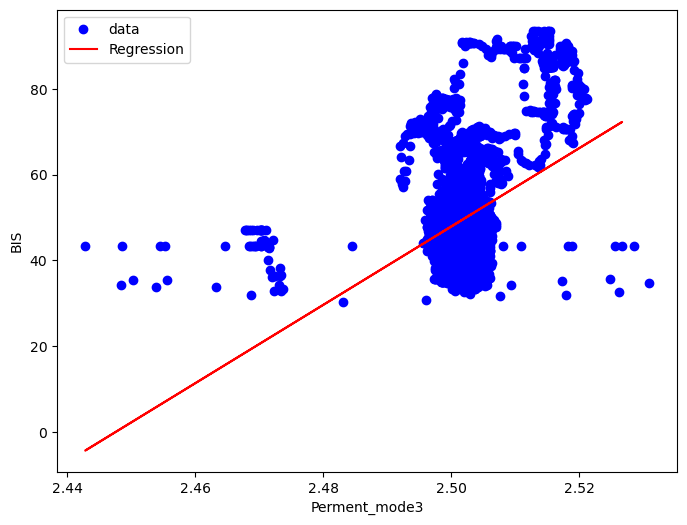

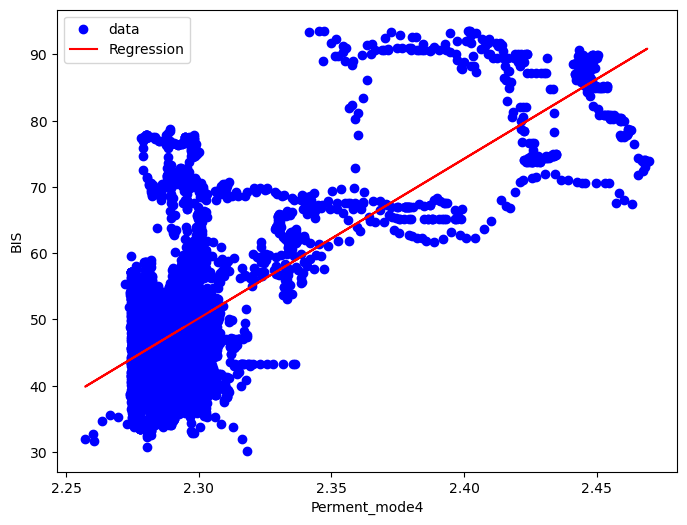

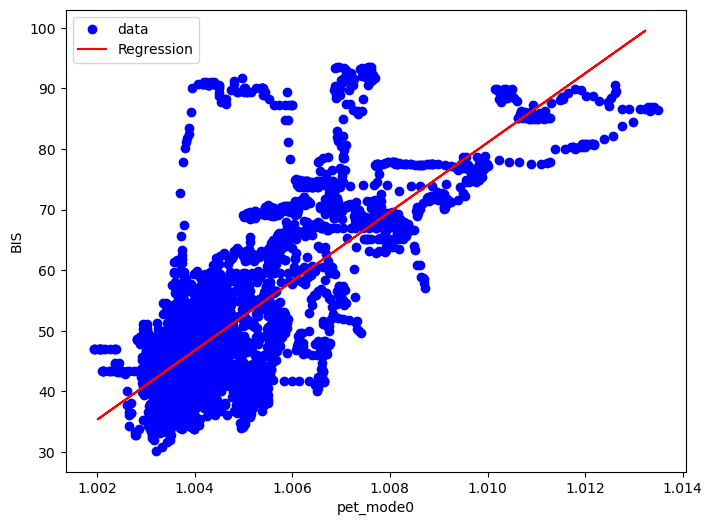

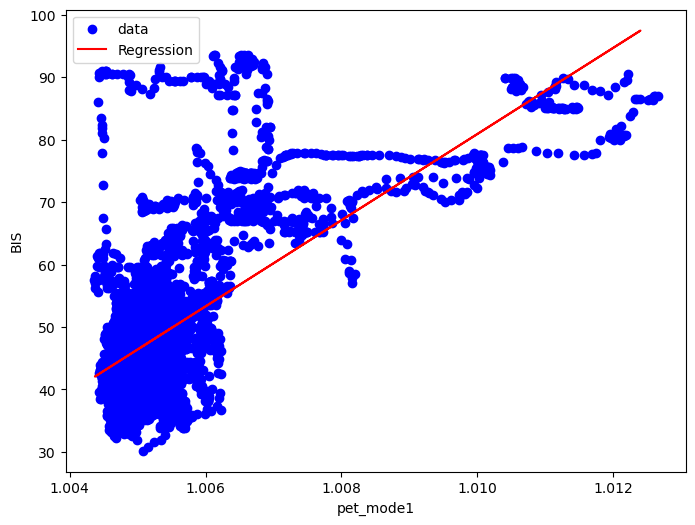

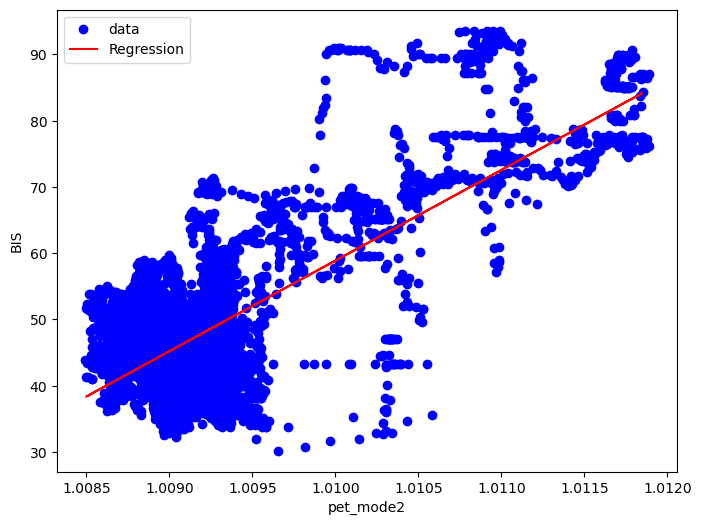

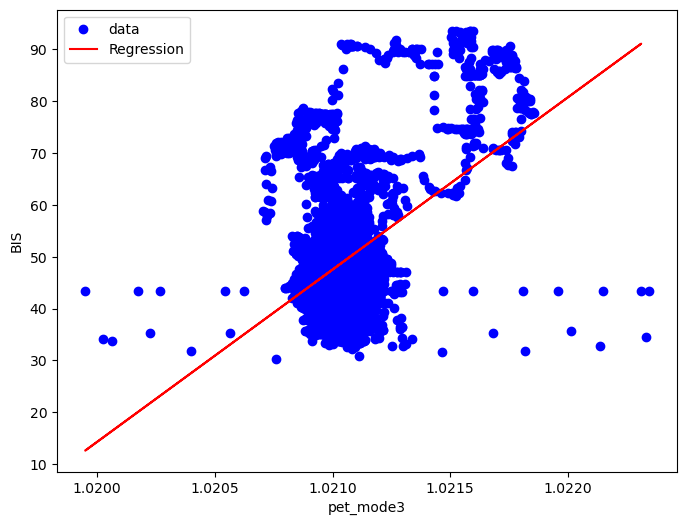

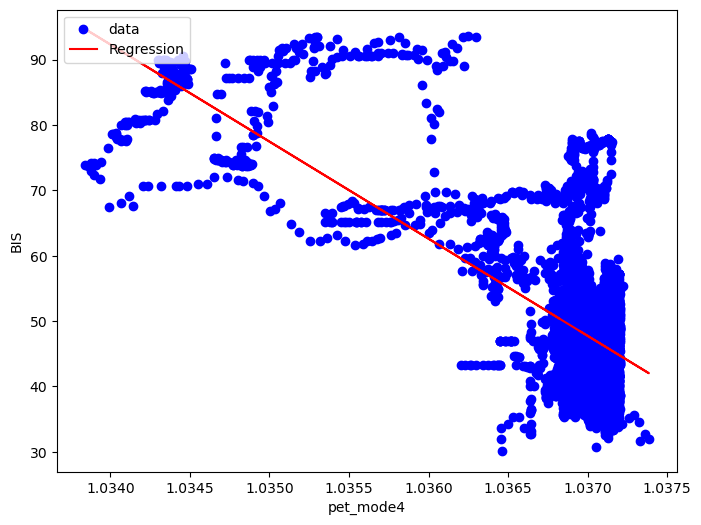

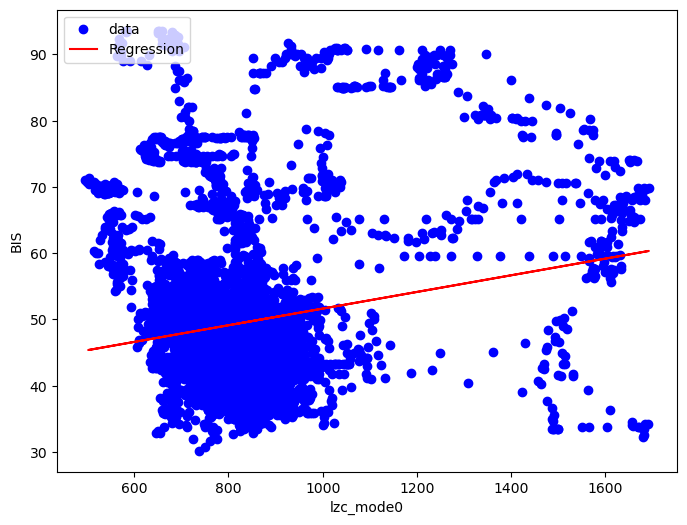

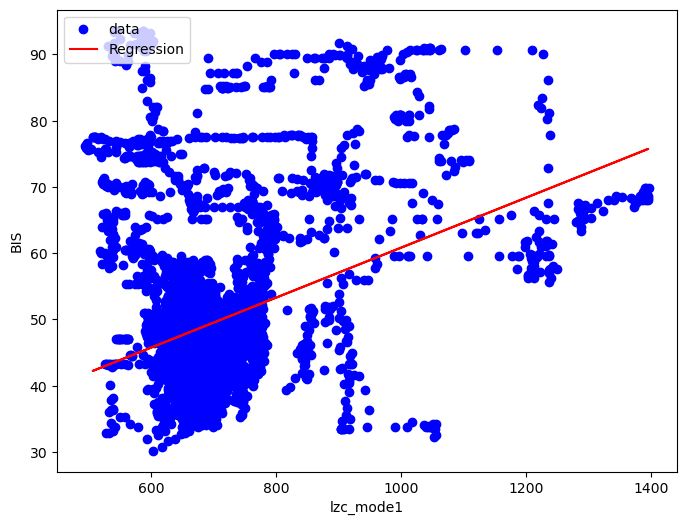

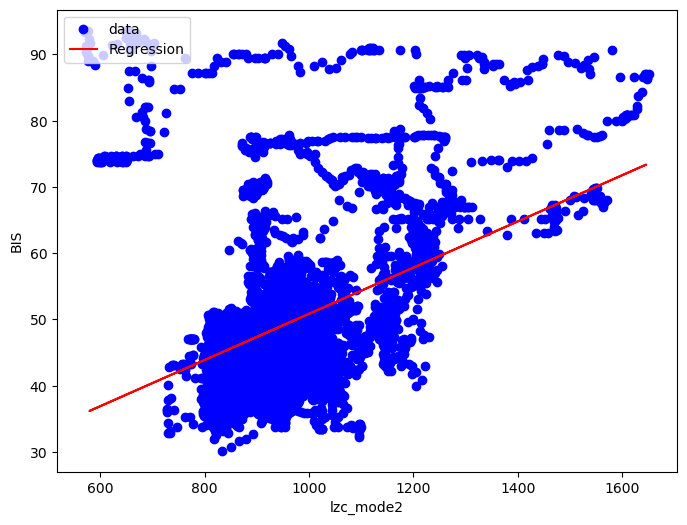

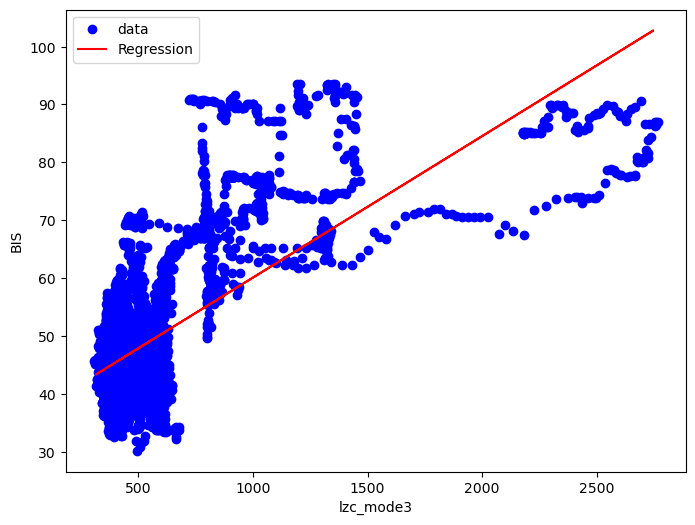

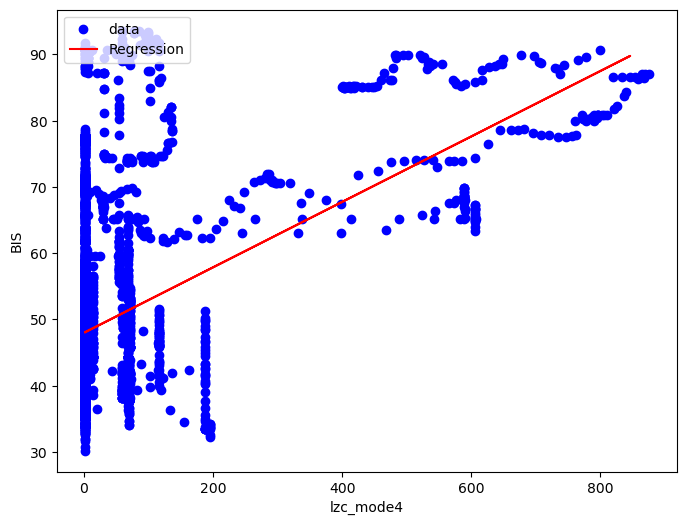

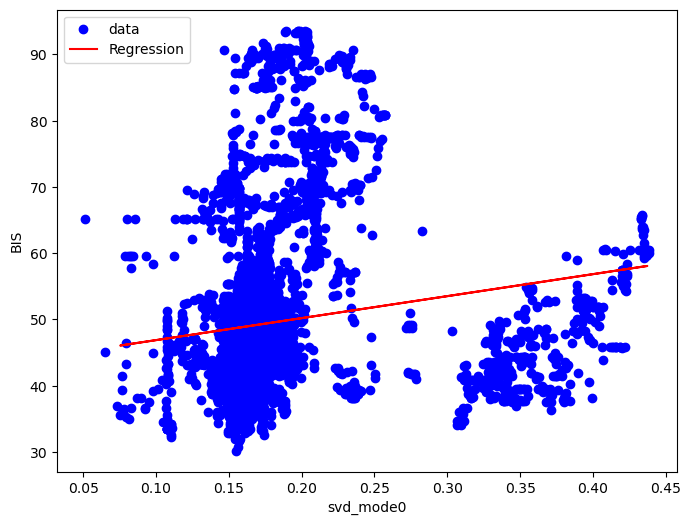

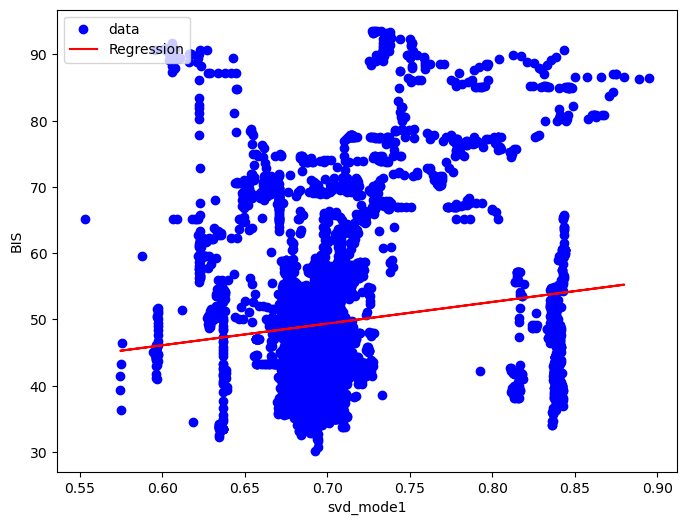

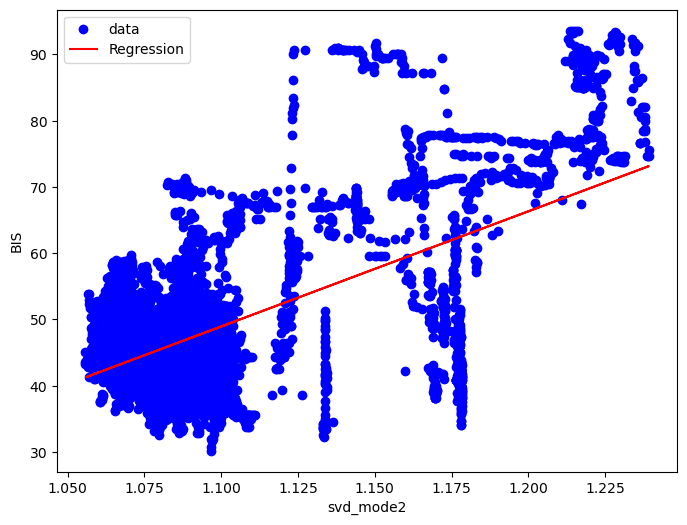

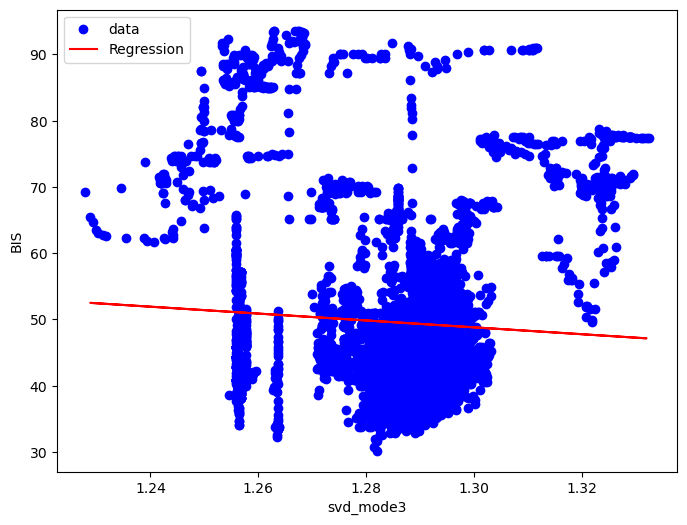

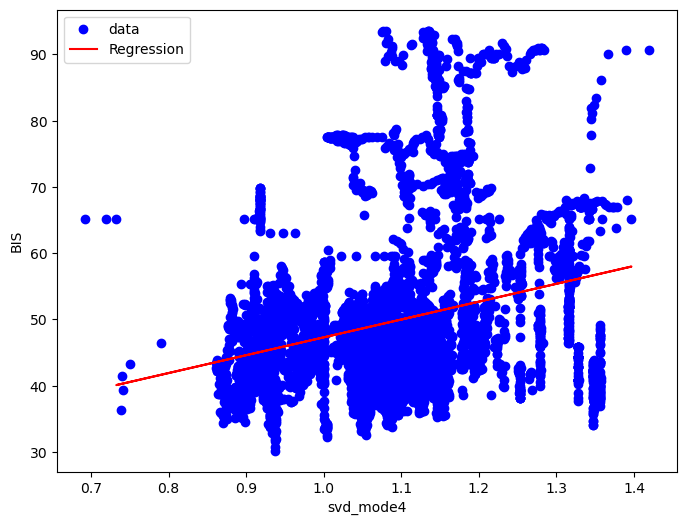

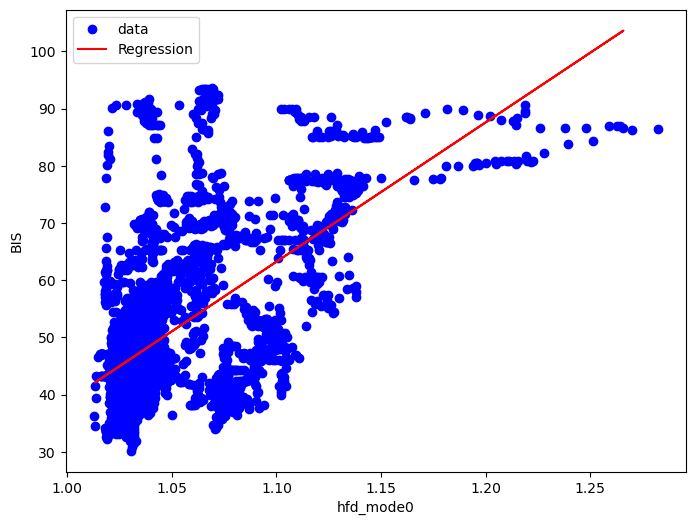

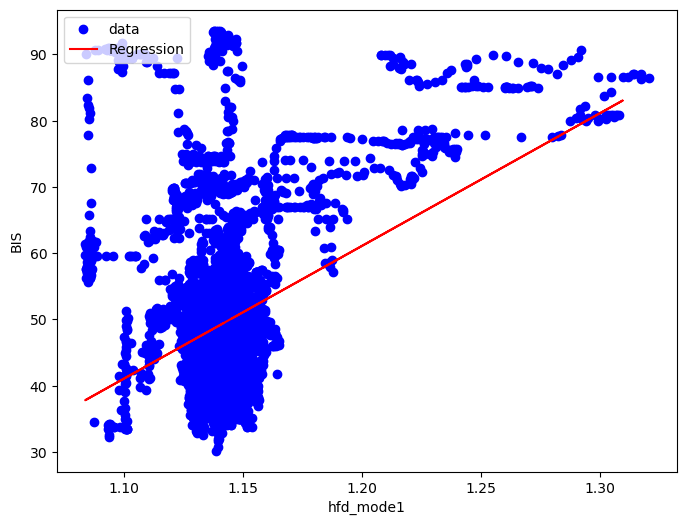

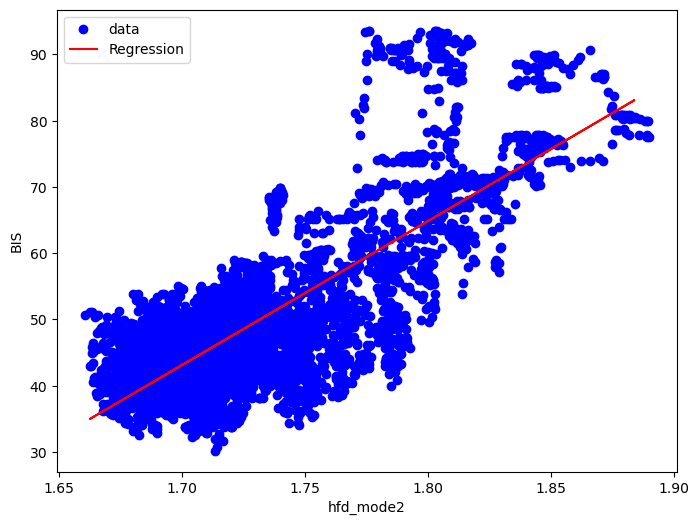

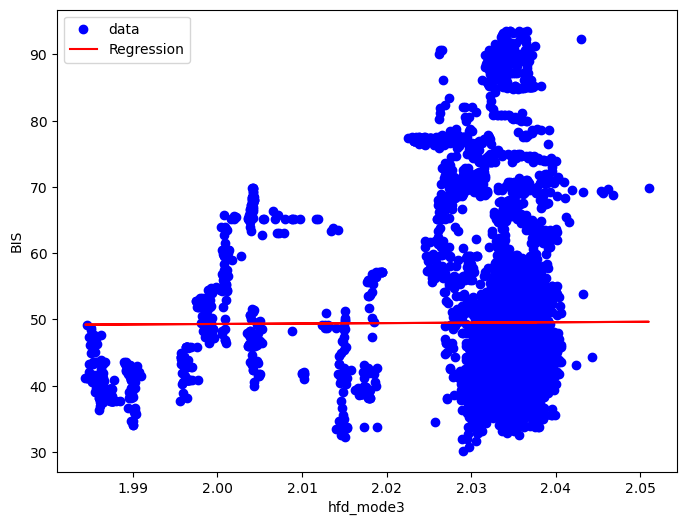

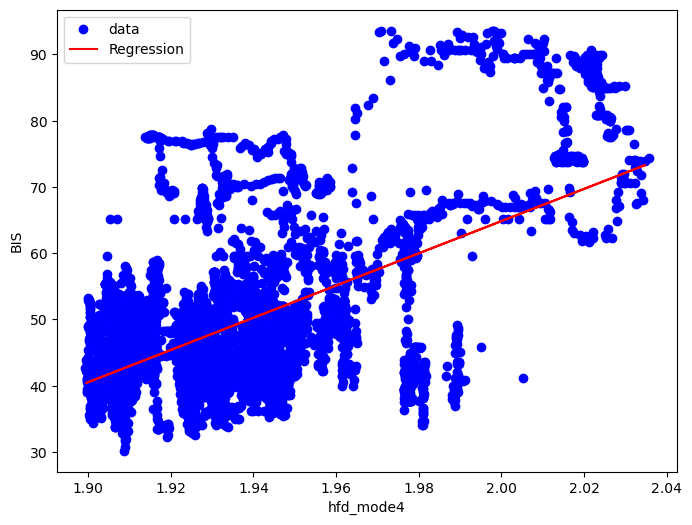

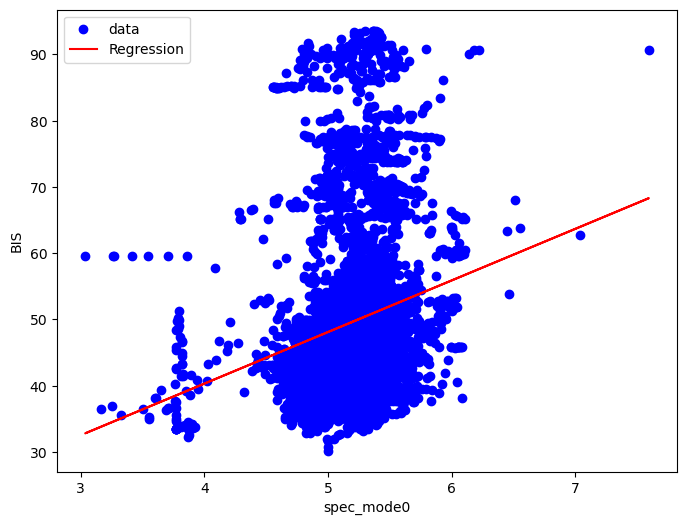

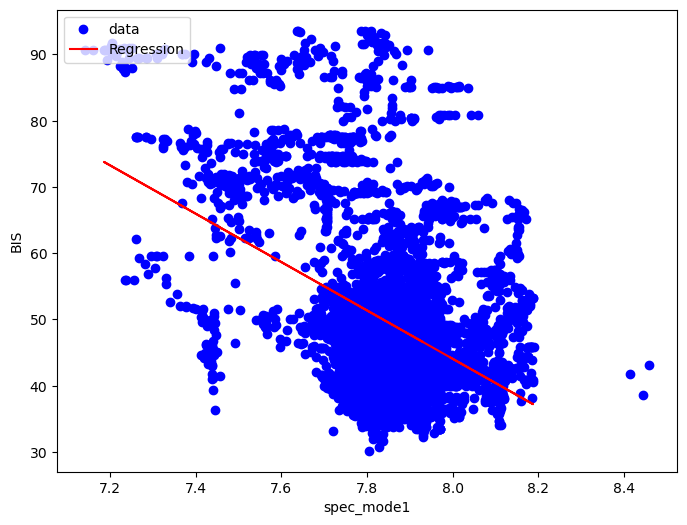

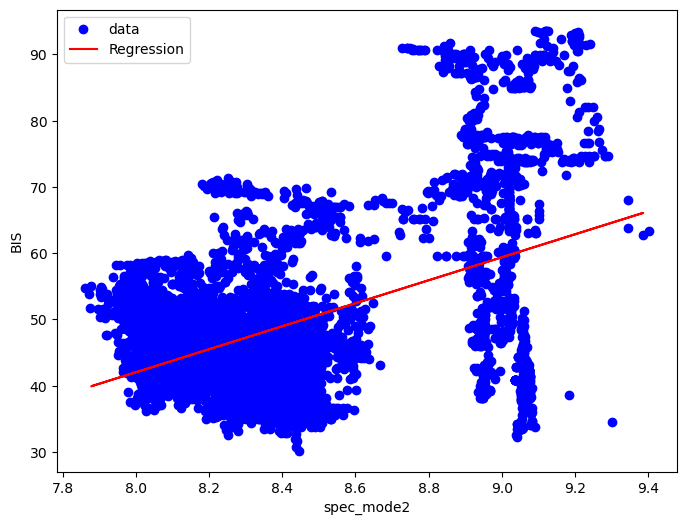

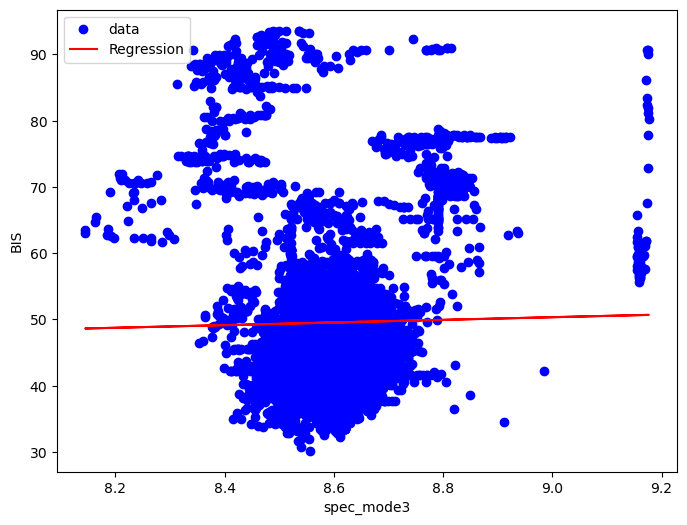

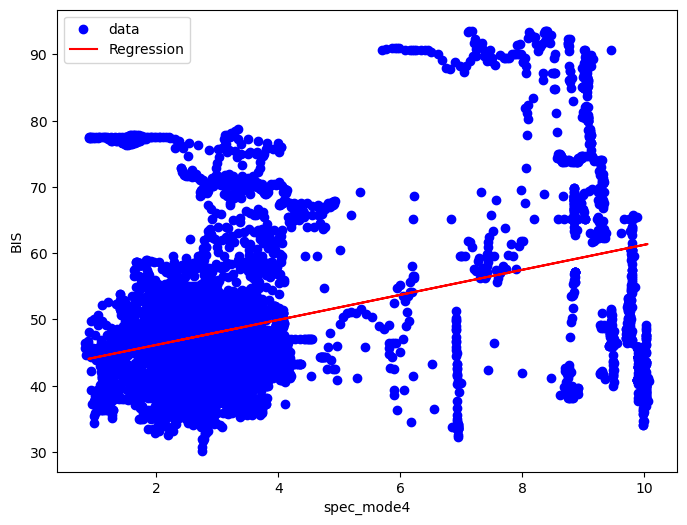

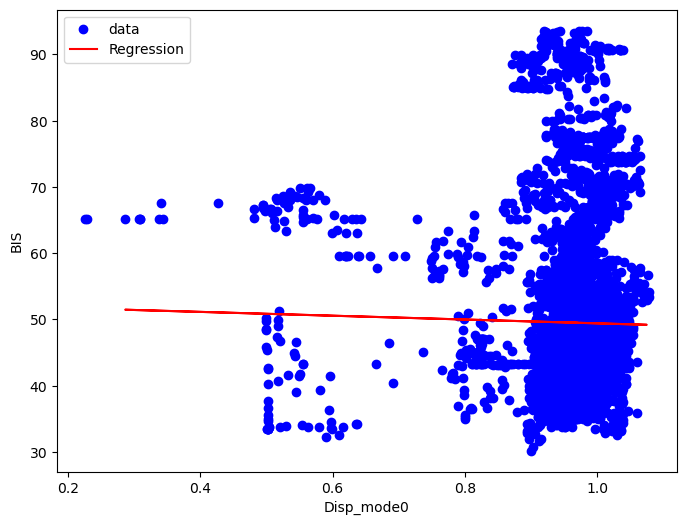

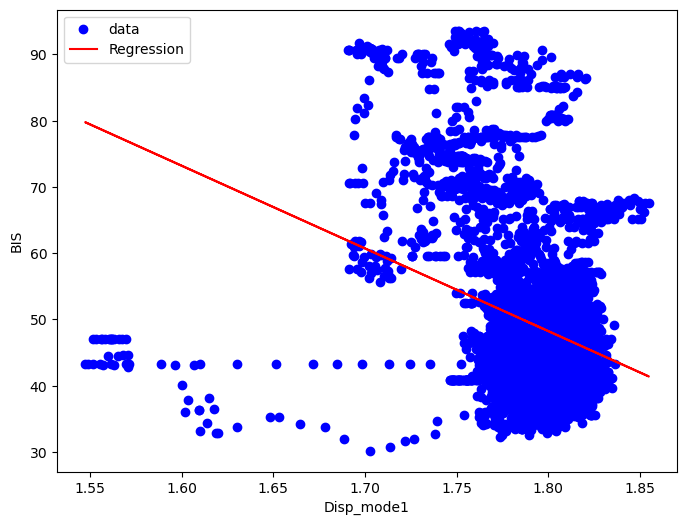

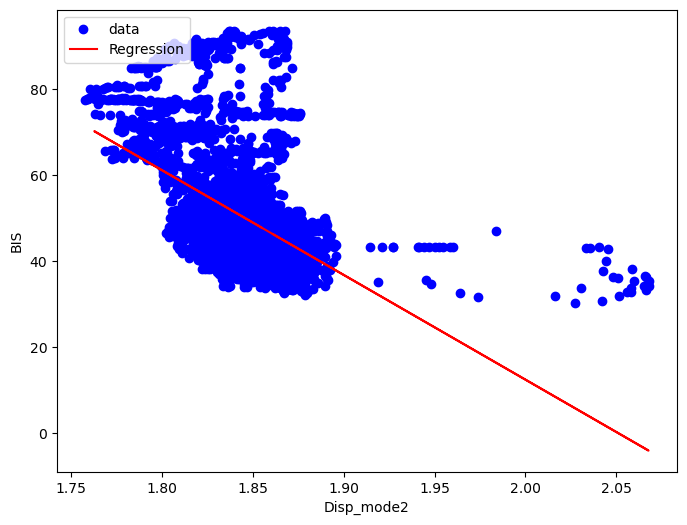

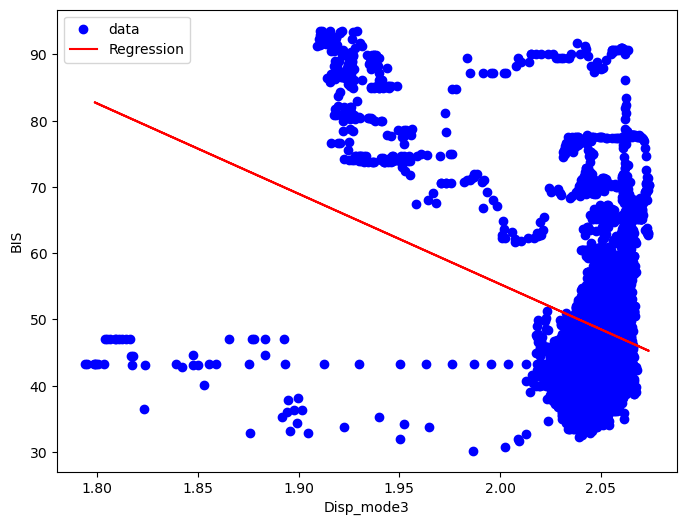

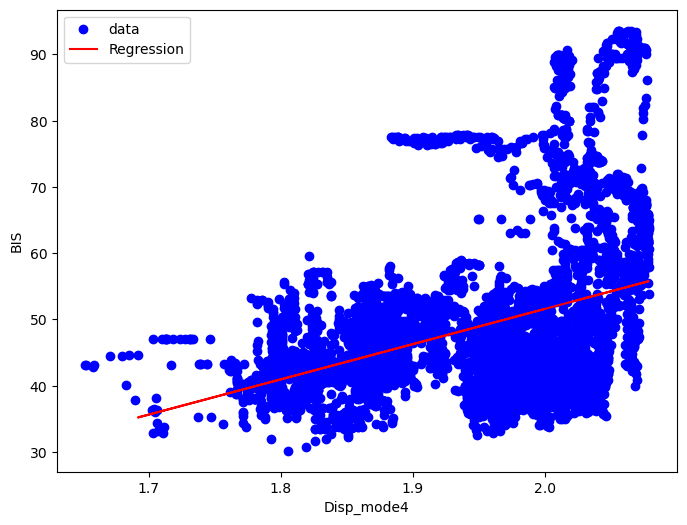

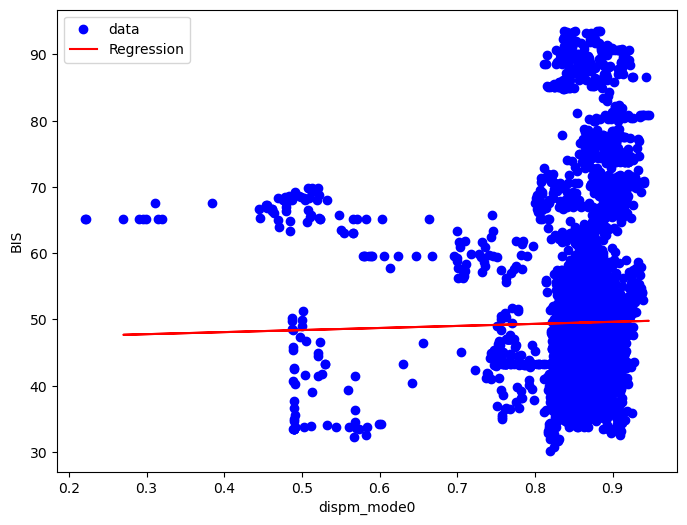

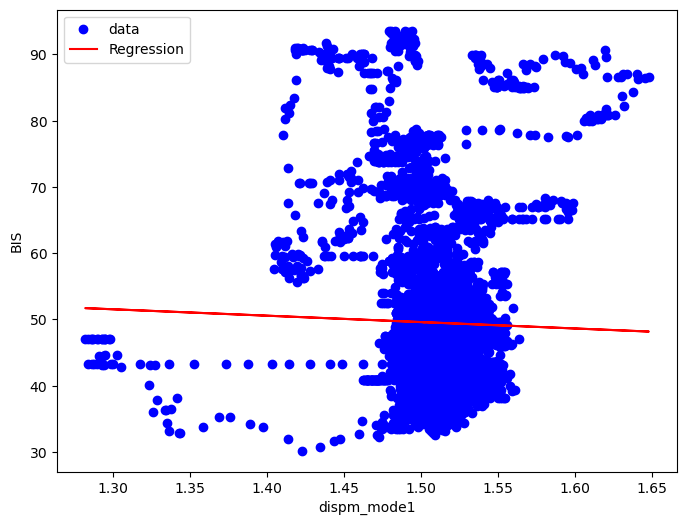

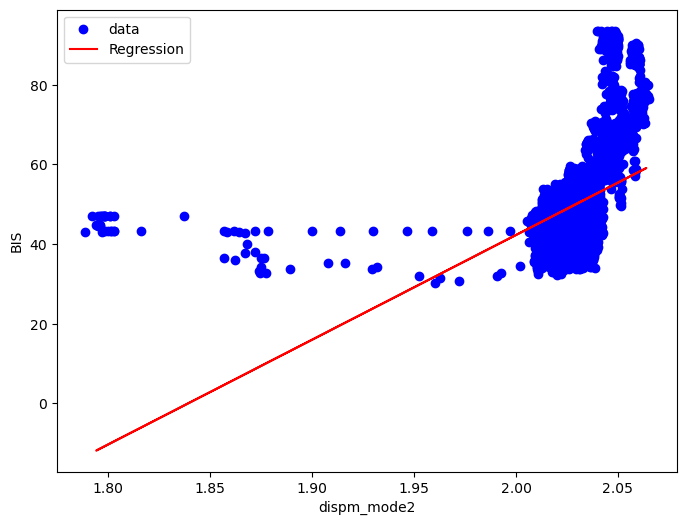

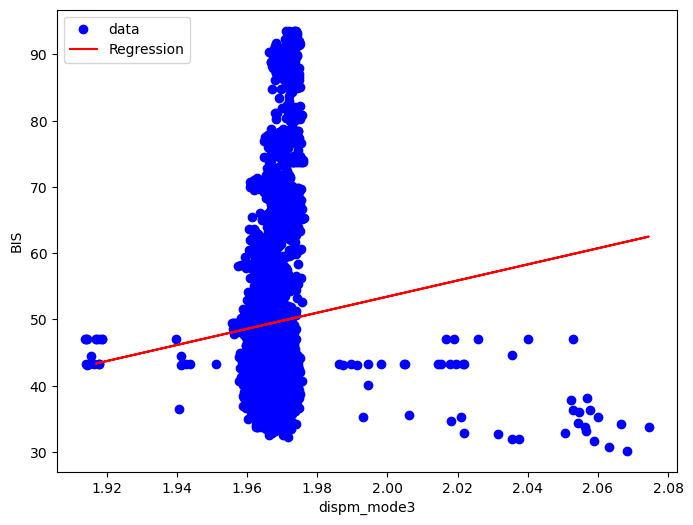

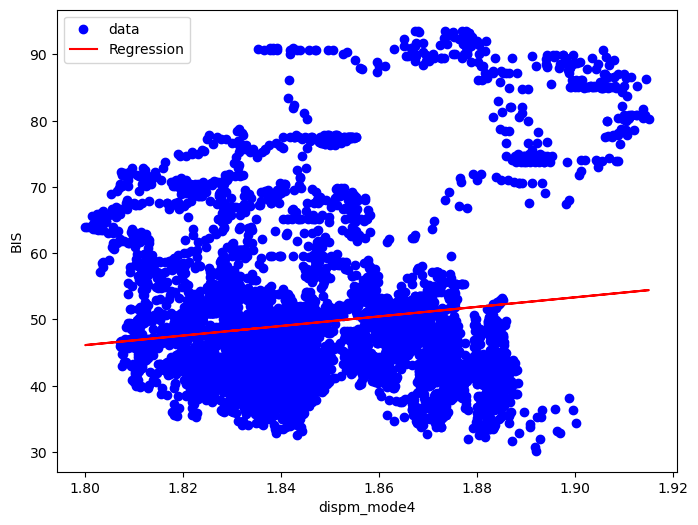

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
42,hfd_mode2_r2,62.512794
25,pet_mode0_r2,59.107527
20,Perment_mode0_r2,58.867672
22,Perment_mode2_r2,55.828239
27,pet_mode2_r2,55.367593
33,lzc_mode3_r2,51.167209
24,Perment_mode4_r2,49.392458
29,pet_mode4_r2,47.862467
2,hm_mode2_r2,46.303536
21,Perment_mode1_r2,44.827998


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
57    dispm_mode2    0.397726
33      lzc_mode3    0.266387
52     Disp_mode2    0.038431
59    dispm_mode4    0.037476
7        hc_mode2    0.035438
30      lzc_mode0    0.016097
8        hc_mode3    0.013187
40      hfd_mode0    0.012113
42      hfd_mode2    0.012078
45     spec_mode0    0.009499
3        hm_mode3    0.008870
22  Perment_mode2    0.007559
44      hfd_mode4    0.007327
53     Disp_mode3    0.006711
38      svd_mode3    0.006677
54     Disp_mode4    0.005616
49     spec_mode4    0.005252
31      lzc_mode1    0.005203
46     spec_mode1    0.004841
1        hm_mode1    0.004837
24  Perment_mode4    0.004724
6        hc_mode1    0.004586
32      lzc_mode2    0.004552
5        hc_mode0    0.004177
2        hm_mode2    0.003917
36      svd_mode1    0.003675
20  Perment_mode0    0.003599
9        hc_mode4    0.003538
21  Perment_mode1    0.003275
37      svd_mode2    0.003079
29      pet_mode4    0.003023
50     Disp_mode0    0.003021
51     Dis